In [24]:
import pyeparse
import os.path as op
import numpy as np
import pandas
from scipy.stats import ttest_ind
%matplotlib inline


subject = 'A0149'
path = '/Users/teon/Google Drive/E-MEG/data/%s/behavioral/' % subject
raw_file = op.join(path, '%s_OLDT.edf' % subject)
data_file = op.join(path, 'actual_TRIAL_DataSource_%s_OLDT_BLOCKTRIAL.dat' % subject)

In [25]:
data = np.loadtxt(data_file, dtype=str, delimiter='\t')
raw = pyeparse.RawEDF(raw_file)
pat = '!V TRIAL_VAR TIME_TARGET'
msgs = raw.find_events(pat, 1)[:,-1]
times = np.array([int(x[(len(pat) + 1):]) for x in msgs], int)
assert data.shape[0] == times.shape[0]

# clean empty
idx = np.where(times != -1)[0]
data = data[idx]
times = times[idx]

# clean outliers
idx = np.where(np.abs(times) < times.mean() + 3 * np.std(times))
data = data[idx]
times = times[idx]

In [26]:
triggers = data[:,10].astype(int)
exp = np.array([(x & 2 ** 5) >> 5 for x in triggers], dtype=bool)
triggers = triggers[exp]

relatedness = np.array([(x & 2 ** 4) >> 4 for x in triggers], dtype=bool)
nonword_pos = np.array([(x & (2 ** 3 + 2 ** 2)) >> 2 for x in triggers])
current_pos = np.array([(x & (2 ** 1 + 2 ** 0)) >> 0 for x in triggers])

idx = np.where(nonword_pos - current_pos != 0)[0]
idy = np.where(current_pos < nonword_pos)[0]
idy2 = np.where(nonword_pos == 0)[0]
idy = np.unique(np.hstack((idy, idy2)))

relatedness_idx = np.where(relatedness)[0]
words_idx = np.intersect1d(idx, idy)
nonwords_idx = np.where(nonword_pos - current_pos == 0)[0]
primes_idx = np.intersect1d(np.where(current_pos == 1)[0], words_idx)
targets_idx = np.intersect1d(np.where(current_pos == 2)[0], words_idx)


In [27]:
# semantic priming condition
primed_idx = np.intersect1d(relatedness_idx, targets_idx)
unprimed_idx = np.setdiff1d(targets_idx, primed_idx)

primed = times[primed_idx]
unprimed = times[unprimed_idx]

idx = np.min([primed.size, unprimed.size])
df = pandas.DataFrame(np.array([unprimed[:idx], primed[:idx]]).T, columns = ['unprimed', 'primed'])

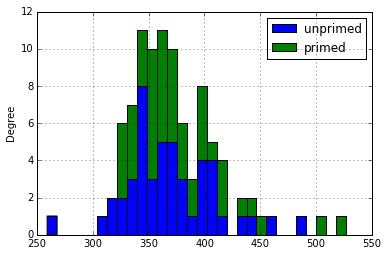

In [28]:
df.plot(kind='hist', stacked=True, bins=30)

In [29]:
ttest_ind(df['unprimed'], df['primed'])

(-0.8774436361683442, 0.38253134026489366)

In [30]:
df['unprimed'].mean(), df['unprimed'].std()

(368.0, 40.504428099310005)

In [31]:
df['primed'].mean(), df['primed'].std()

(375.51063829787233, 42.461682133232927)

In [32]:
df['unprimed'].mean() - df['primed'].mean()

-7.5106382978723332

In [33]:
df.shape

(47, 2)

In [34]:
triggers[unprimed_idx]

array([34, 34, 46, 34, 34, 34, 34, 46, 34, 34, 34, 34, 34, 34, 34, 34, 34,
       34, 46, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 46, 34, 34, 34, 34,
       34, 34, 46, 46, 34, 34, 46, 34, 34, 34, 34, 34, 34])